In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
%matplotlib inline

In [2]:
import os, shutil
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in sorted(glob(os.path.join('../data/DF2/raw/', 'f*_flc.fits'))):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/DF2/raw/DF2_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
vals = {}
for f in sorted(glob('../data/DF2/raw/DF2_F814W_EXP*_flc.fits')):
    asn = fits.getval(f, 'asn_id')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [6]:
vals

{'JD5H02020': ['../data/DF2/raw/DF2_F814W_EXP1_flc.fits',
  '../data/DF2/raw/DF2_F814W_EXP2_flc.fits',
  '../data/DF2/raw/DF2_F814W_EXP3_flc.fits',
  '../data/DF2/raw/DF2_F814W_EXP4_flc.fits']}

In [7]:
vals = {}
for f in sorted(glob('../data/DF2/raw/DF2_F606W_EXP*_flc.fits')):
    asn = fits.getval(f, 'ROOTNAME')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [8]:
vals

{'jd5h02wnq': ['../data/DF2/raw/DF2_F606W_EXP1_flc.fits'],
 'jd5h02wpq': ['../data/DF2/raw/DF2_F606W_EXP2_flc.fits'],
 'jd5h02wrq': ['../data/DF2/raw/DF2_F606W_EXP3_flc.fits'],
 'jd5h02wtq': ['../data/DF2/raw/DF2_F606W_EXP4_flc.fits']}

In [9]:
files = {'F606W': ['../data/DF2/raw/DF2_F606W_EXP{:d}_flc.fits'.format(i) for i in range(1, 5)],
         'F814W': ['../data/DF2/raw/DF2_F814W_EXP{:d}_flc.fits'.format(i) for i in range(1, 5)]}
outputs = {'F606W': '../data/DF2/reduced/DF2_F606W_drc.fits',
          'F814W': '../data/DF2/reduced/DF2_F814W_drc.fits'}
diff_im = '../data/DF2/reduced/DF2_V-I.fits'
darks = {}

In [10]:
from drizzlepac import tweakreg

# Alignment and Drizzling

In [11]:
# os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/M87/calibration/'

In [14]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F814W', realign_kwargs={'threshold': 50, 
                                                                                         'refimagefindcfg': {'threshold': 50}},
                                verbose=True, realign_only=True, )

*****************************************************
Realign and Redrizzle relative to F814W
--F606W: Realigning
{'conv_width': 4.0, 'threshold': 50, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'TWEAK_F814W', 'refimage': '../data/DF2/reduced/DF2_F814W_drc.fits', 'nclip': 10, 'refimagefindcfg': {'threshold': 50}}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 14:42:35.819 (28/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F606W_drc.fits

===  Source finding for image 

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: -1.2725074382781309e-05 4.6076630245593124e-06
CD_21  CD_22: 5.457581400193441e-06 1.3194298666071918e-05
CRVAL    : 40.43759258222769 -8.42521112367047
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049842259217400625
ORIENTAT : 19.25002964124506
WCSNAME  :  TWEAK_F814W_1

Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: -1.250303230838088e-05 4.356264166596649e-06
CD_21  CD_22: 5.561625587281927e-06 1.2787923798047788e-05
CRVAL    : 40.44716100819662 -8.397922951526372
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04925971208303087
ORIENTAT : 18.8116423141606
WCSNAME  :  TWEAK_F814W_1


Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP2_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: -1.2725078479108753e-05 4.60766894601631e-06
CD_21  CD_22: 5.457587573156216e-06 1.3194303219234092e-05
CRVAL    : 40.43759257557334 -8.425211123051712
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04984228152046903
ORIENTAT : 19.25004640580106
WCSNAME  :  TWEAK_F814W_1

Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: -1.2503036273639276e-05 4.356269853937209e-06
CD_21  CD_22: 5.561631734803092e-06 1.2787928250936052e-05
CRVAL    : 40.4471610138799 -8.397922941467812
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049259734

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP3_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP3_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP3_flc.fits[1]
WCS Keywords

CD_11  CD_12: -1.2723924062928632e-05 4.608776480528796e-06
CD_21  CD_22: 5.458607460098531e-06 1.3193211945329636e-05
CRVAL    : 40.437361562363414 -8.425987122516375
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049839909694840236
ORIENTAT : 19.255808334980134
WCSNAME  :  TWEAK_F814W_1

Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP3_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP3_flc.fits[4]
WCS Keywords

CD_11  CD_12: -1.2501881999436065e-05 4.35734836774524e-06
CD_21  CD_22: 5.562624229528468e-06 1.2786881608999372e-05
CRVAL    : 40.4469323382931 -8.39870119143862
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04925738998054006
ORIENTAT : 18.817420488376644
WCSNAME  :  TWEAK_F814W_1

....Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP4_flc.fits...


Processing /Users

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP4_flc.fits[1]
WCS Keywords

CD_11  CD_12: -1.2724745820002386e-05 4.609091214346348e-06
CD_21  CD_22: 5.458976962390356e-06 1.3194065174213036e-05
CRVAL    : 40.43736123432359 -8.425988026832057
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049843152622106035
ORIENTAT : 19.255872874895573
WCSNAME  :  TWEAK_F814W_1

Processing /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP4_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/DF2/raw/DF2_F606W_EXP4_flc.fits[4]
WCS Keywords

CD_11  CD_12: -1.2502689214469696e-05 4.357646273165374e-06
CD_21  CD_22: 5.563000239128279e-06 1.2787708711903316e-05
CRVAL    : 40.44693266404555 -8.39870033099376
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049260595052590034
ORIENTAT : 18.81748494308701
WCSNAME  :  TWEAK_F814W_1
--F606W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/DF2/reduced/DF2_F606W_drc.fits
{'cl

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 14:46:56.701 (28/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F814W_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F606W_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F814W_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F814W_drc.fits', EXT=('SCI', 1) started at: 14:46:56.878 (28/03/2019)
     Found 383 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F814W_drc.fits': 383

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/DF2/reduced/DF2_F606W_drc.fits':
  #  Sourc

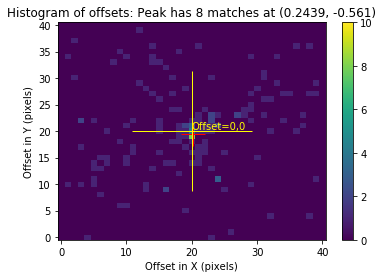

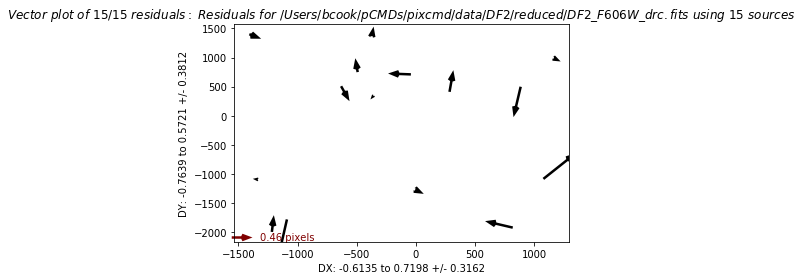

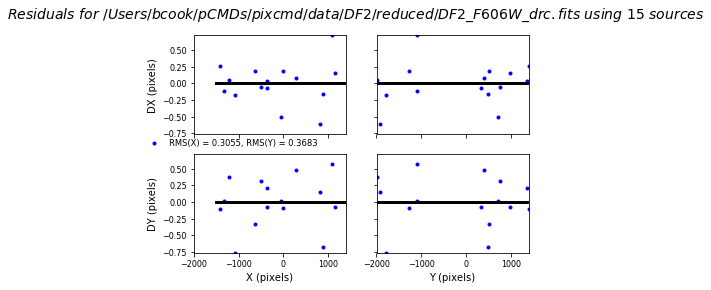

In [17]:
tweakreg.TweakReg([outputs['F814W'], outputs['F606W']], conv_width=4.0, threshold=50, nclip=10, minobj=5,
                  shiftfile=False, writecat=False, clean=True,
                 interactive=False, updatehdr=False)

In [18]:
# Create difference image to check alignment
f1 = fits.open(outputs['F814W'])
f2 = fits.open(outputs['F606W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [19]:
ppy.data.alignment._add_flag(outputs['F814W'], exp_ratio=0.9)
ppy.data.alignment._add_flag(outputs['F606W'], exp_ratio=0.9)

In [20]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F814W'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 2min 50s, sys: 5.24 s, total: 2min 56s
Wall time: 3min 5s


In [21]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F814W'], threshold=10.0)

CPU times: user 3.89 s, sys: 7.78 s, total: 11.7 s
Wall time: 24.6 s


# Manual Source Extraction

In [26]:
ppy.data.sources.mask_sources_manual(outputs['F814W'], '../data/DF2/masks/DF2_F814W.reg')

In [27]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F814W'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [28]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [14]:
regions = ppy.data.extraction.add_regions(outputs, '../data/DF2/masks/DF2_F814W_contours.reg', base_filter='F814W',
                                          xc=2474, yc=3411, do_quadrants=False)

100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


# Extract PCMDs

In [15]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F814W', 'F606W', path='../data/DF2/pcmds/', name_append='DF2_I_VI')

Filter: F814W
Observation Date: 57708 (MJD)
Vega ZeroPoint: 25.5163
AB ZeroPoint: 25.9442
ST ZeroPoint: 26.7798
Exposure Time: 2320.0
A pre-made filter is available
Filter: F606W
Observation Date: 57708 (MJD)
Vega ZeroPoint: 26.4044
AB ZeroPoint: 26.4977
ST ZeroPoint: 26.6679
Exposure Time: 2180.0
A pre-made filter is available


100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


In [16]:
pcmds.keys()

dict_keys([1])

# Check

In [11]:
pcmds = {}
for i in tqdm(range(1, 2)):
    filename = f'../data/DF2/pcmds/DF2_I_VI_{i}.pcmd'
    try:
        pcmds[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if len(pcmds[i]) == 0:
        pcmds.pop(i)
        os.remove(filename)

100%|██████████| 1/1 [00:00<00:00,  7.92it/s]


In [12]:
keys = np.array(list(pcmds.keys()))

In [13]:
keys

array([1])

In [14]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

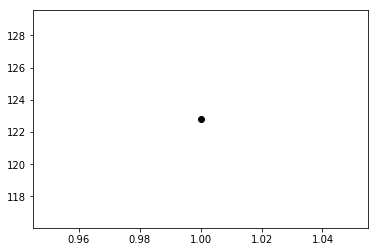

In [17]:
plt.plot(Neffs.keys(), Neffs.values(), 'ko')

In [18]:
f = ppy.instrument.default_df2_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [76]:
ppy.distancemodels.mpc_to_dmod(10.0), ppy.distancemodels.mpc_to_dmod(25.0)

(30.0, 31.989700043360187)

In [75]:
ppy.distancemodels.mpc_to_dmod(20.0)

31.505149978319906

In [51]:
dmod = 31.505

In [52]:
ppy.distancemodels.dmod_to_mpc(dmod)

19.998618696327437

In [53]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [54]:
age = np.log10(8.9e9)
feh = -1.07

In [55]:
gal_1 = ppy.galaxy.SSPSimple(np.array([feh, -2., 1., age]), dmod=dmod)
gal_2 = ppy.galaxy.SSPSimple(np.array([feh, -2., 2., age]), dmod=dmod)
gal_3 = ppy.galaxy.SSPSimple(np.array([feh, -2., 3., age]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([feh, -2., 4., age]), dmod=dmod)

In [65]:
sky = [187.3, 210.6]
f[0].counts_to_mag(sky[0])

28.248675518789156

In [57]:
pcmd_1, _ = driv.simulate(gal_1, 256, sky_noise=sky)
pcmd_2, _ = driv.simulate(gal_2, 256, sky_noise=sky)
pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky)

In [58]:
is_dark = False
fig, ax = plt.subplots(figsize=(8, 5))
pcmd = pcmds[1]
ppy.plotting.plot_pcmd(pcmd, ax=ax)
# ppy.plotting.plot_pcmd_contours(pcmd_1, keep_limits=True, ax=ax, alpha=0.3, color=('w' if is_dark else 'k'))
ppy.plotting.plot_pcmd_contours(pcmd_2, keep_limits=True, ax=ax, alpha=0.3, color=('w' if is_dark else 'k'))
ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=ax, alpha=0.3, color=('w' if is_dark else 'k'))
ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=ax, alpha=0.3, color=('w' if is_dark else 'k'))
ax.set_title('NGC1052-DF2, Neff = {:.0f}'.format(np.sqrt(pcmd.shape[1])))
ppy.plotting.plot_isochrone(iso_model, dmod=dmod, axes=ax, mag_system='vega')
ax.axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
ax.set_xlim([0, 1.5])
ax.set_ylim([29, 27])
plt.tight_layout()
try:
    plt.savefig(f'figures/DF2/DF2_pcmds.pdf')
except TypeError:
    pass
plt.close()

In [66]:
np.median(pcmd[0])

28.160999

In [67]:
np.median(pcmd_1[0])

28.250416

In [68]:
np.median(pcmd_2[0])

28.238865

In [69]:
np.median(pcmd_3[0])

28.124472

In [70]:
np.median(pcmd_4[0])

27.37968